In [83]:
# import nltk

In [84]:
# nltk.download()

In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('K8 Reviews v0.2.csv')

In [3]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [4]:
reviews['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [5]:
reviews.shape

(14675, 2)

In [6]:
reviews_combined = ' '.join(reviews['review'])

In [7]:
from wordcloud import WordCloud

In [8]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

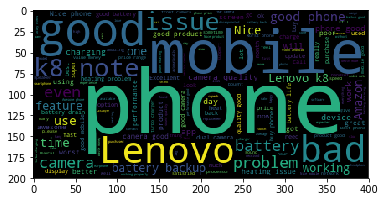

In [9]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [10]:
word_cloud = WordCloud(width=800,height=800,background_color = 'white',max_words=150).generate_from_text(reviews_combined)

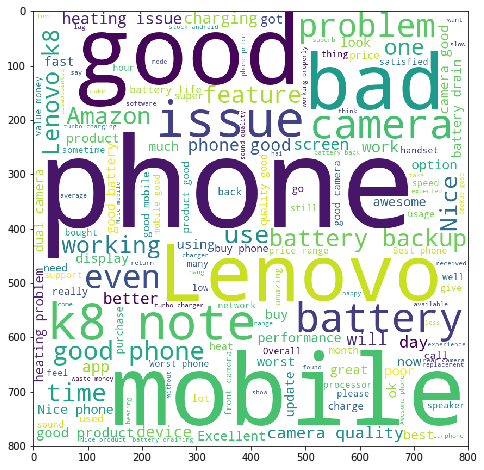

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(word_cloud)
plt.show()

In [12]:
import seaborn as sns

In [13]:
word_dict = {}
for i in reviews_combined.split(' '):
    if i in word_dict:
        word_dict[i]+=1
    else:
        word_dict[i]=0

In [14]:
word_df = pd.Series(word_dict)

In [15]:
df = pd.DataFrame(word_df).reset_index()

In [16]:
df.columns = ['words','counts']

In [17]:
df2 = df.sort_values(by='counts',ascending=False).head(25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

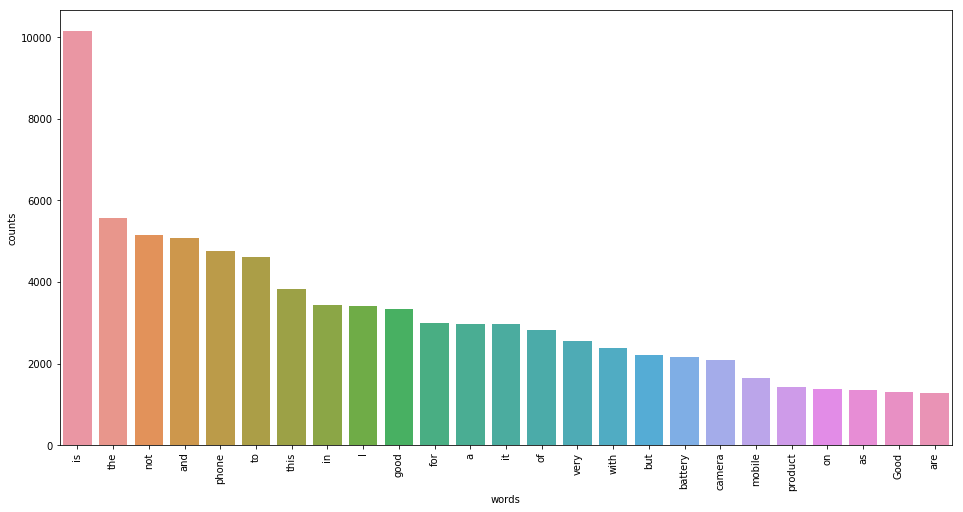

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(x='words',y='counts',data=df2)
plt.xticks(rotation='vertical')

In [19]:
txt = "This hotel is awesome, isn't it? couldnt have been  a better place than this" 
text =txt.split(' ')
print(text)

['This', 'hotel', 'is', 'awesome,', "isn't", 'it?', 'couldnt', 'have', 'been', '', 'a', 'better', 'place', 'than', 'this']


In [20]:
from nltk.tokenize import word_tokenize

In [21]:
print(word_tokenize(txt))

['This', 'hotel', 'is', 'awesome', ',', 'is', "n't", 'it', '?', 'couldnt', 'have', 'been', 'a', 'better', 'place', 'than', 'this']


In [22]:
from nltk.tokenize import wordpunct_tokenize

In [23]:
print(wordpunct_tokenize(txt))

['This', 'hotel', 'is', 'awesome', ',', 'isn', "'", 't', 'it', '?', 'couldnt', 'have', 'been', 'a', 'better', 'place', 'than', 'this']


## Twitter text cleaning

In [24]:
txt = 'LMAO #killing it, luv mah lyf YOLO LOL :D :D <3 @raju'

In [25]:
from nltk.tokenize import TweetTokenizer

In [26]:
tokenizer = TweetTokenizer()

In [27]:
print(tokenizer.tokenize(txt))

['LMAO', '#killing', 'it', ',', 'luv', 'mah', 'lyf', 'YOLO', 'LOL', ':D', ':D', '<3', '@raju']


In [28]:
message = "Living life king size #chilling #lifegoals #yolo #wanderlust"

In [29]:
from nltk.tokenize import regexp_tokenize

In [30]:
regexp_tokenize(message,'#([\w]+)')

['chilling', 'lifegoals', 'yolo', 'wanderlust']

## Punctuations

In [31]:
from string import punctuation

In [32]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


## stopwords

In [33]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words('english')
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
punct_stop = list(punctuation)+stop_nltk

In [35]:
txt = 'i am not able to work today, i will be taking off'
[word for word in word_tokenize(txt) if word not in punct_stop]

['able', 'work', 'today', 'taking']

## Appling above code to combined_review

In [36]:
' '.join(reviews.review).lower()

'good but need updates and improvements worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don\'t know how lenovo will survive by making full of us.please don;t go for this else you will regret like me. when i will get my 10% cash back.... its already 15 january.. good the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon only i\'m telling don\'t buyi\'m totally disappointedpoor batterypoor camerawaste of money phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note the battery level has worn down it\'s over hitting problems...an

In [37]:
from nltk.tokenize import word_tokenize

In [38]:
all_terms = word_tokenize(reviews_combined.lower())

In [39]:
len(all_terms)

324233

In [40]:
from nltk.tokenize import wordpunct_tokenize

In [41]:
all_terms = ' '.join(all_terms)

In [42]:
all_terms = wordpunct_tokenize(all_terms)

In [43]:
all_terms = [word for word in all_terms if word not in punct_stop]
len(all_terms)

192702

In [44]:
stop_nltk = stopwords.words('english')

In [45]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ['phone','mobile']

In [46]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word)>2]

In [47]:
reviews_updated1[:20]

['good',
 'need',
 'updates',
 'improvements',
 'worst',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'hours',
 'internet',
 'uses',
 'even',
 'put',
 'idle',
 'getting',
 'discharged']

In [48]:
a = "hi couldn't"
a = wordpunct_tokenize(a)

In [49]:
[i for i in a if i not in stop_updated]

['hi']

## Stemming

- Take a string to its root form
- it is Rule based and chops off the string at the end of the word
- the stemmed word might not be part of the dictionary
- 2 types:
 1.porter stemmer - oldest one originally developed in 1979
 2.snowball stemmer - sophisticated stemmer , supports multiple language. faster than ported stemmer

In [50]:
from nltk.stem import PorterStemmer,SnowballStemmer

In [51]:
stemmer_p = PorterStemmer()

In [52]:
stemmer_p.stem('driving')

'drive'

In [53]:
txt4 = 'I mustered all my drive,drove to the driving school'

In [54]:
[stemmer_p.stem(word) for word in word_tokenize(txt.lower())]

['i',
 'am',
 'not',
 'abl',
 'to',
 'work',
 'today',
 ',',
 'i',
 'will',
 'be',
 'take',
 'off']

In [55]:
txt = "he is very methodical and orderly in his execution"

In [56]:
%%time
[stemmer_p.stem(word) for word in word_tokenize(txt.lower())]

Wall time: 0 ns


['he', 'is', 'veri', 'method', 'and', 'orderli', 'in', 'hi', 'execut']

In [57]:
stemmer_s = SnowballStemmer("english")

In [58]:
%%time
print([stemmer_s.stem(word) for word in word_tokenize(txt.lower())])

['he', 'is', 'veri', 'method', 'and', 'order', 'in', 'his', 'execut']
Wall time: 0 ns


In [59]:
txt = "he is very methodical and orderly in his execution"
txt1 = "studies studying cries cry in execute"
txt2 = "studies studying cries cry his execute orderly university universal"
txt3 = "studies studying cries cry likes his execute"
txt4 = "studies studying cries cry his likes execute orderly university universal"

In [60]:
print([stemmer_p.stem(word) for word in word_tokenize(txt1)])
print([stemmer_p.stem(word) for word in word_tokenize(txt2)])

['studi', 'studi', 'cri', 'cri', 'in', 'execut']
['studi', 'studi', 'cri', 'cri', 'hi', 'execut', 'orderli', 'univers', 'univers']


In [61]:
print([stemmer_s.stem(word) for word in word_tokenize(txt1)])
print([stemmer_s.stem(word) for word in word_tokenize(txt2)])

['studi', 'studi', 'cri', 'cri', 'in', 'execut']
['studi', 'studi', 'cri', 'cri', 'his', 'execut', 'order', 'univers', 'univers']


# Lemmetization
- Like stemming ,lemmetization takes the word to the root form called as lemma
- it involves resolving words to their dictinary form
- A lemma of a word is its dictionary form or canonical ofrm
- Lemmetizer in NLTK uses Wordnet data set which comprises a list of synonyms
-vevery step in text cleaning helping is reducing the number of words ,but lemmetizer might not make a difference

In [63]:
from nltk.stem import WordNetLemmatizer

In [64]:
lemm = WordNetLemmatizer()

In [65]:
[lemm.lemmatize(word) for word in word_tokenize(txt.lower())]

['he', 'is', 'very', 'methodical', 'and', 'orderly', 'in', 'his', 'execution']

In [66]:
print([lemm.lemmatize(word,pos='v') for word in word_tokenize(txt4.lower())])

['study', 'study', 'cry', 'cry', 'his', 'like', 'execute', 'orderly', 'university', 'universal']


In [67]:
print([lemm.lemmatize(word,pos='v') for word in word_tokenize(txt4.lower())])

['study', 'study', 'cry', 'cry', 'his', 'like', 'execute', 'orderly', 'university', 'universal']


# Apply stemming and lemmetization on amazon reviews

In [68]:
# %%time
stem_words = [stemmer_s.stem(word) for word in reviews_updated1]

In [69]:
len(list(set(stem_words)))

9756

In [70]:
# %%time
lemm_words = [lemm.lemmatize(word) for word in reviews_updated1]

In [71]:
len(list(set(lemm_words)))

11484

In [91]:
def udf(text):
    token = word_tokenize(text.lower())
    words = [word for word in token if word not in stop_updated and len(word)>2]
    stemm = [stemmer_s.stem(word) for word in words]
#     lemm = [lemm.lemmatize(word) for word in stemm]
    return ' '.join(stemm)

In [92]:
# inp = input()
# print(udf(inp))


In [93]:
reviews['clean_review'] = reviews['review'].apply(udf)

In [ ]:
reviews['non_stemmed_review'] = reviews['review'].apply(udf)

In [ ]:
reviews.head()

In [ ]:
word_cloud = WordCloud().generate_from_text(' '.join(reviews['clean_review']))


In [ ]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [ ]:
words = ' '.join(reviews['clean_review'])
words = words.split(' ')
words.remove("n't")
word_dict = {}
for word in words:
    if word in word_dict:
        word_dict[word]+=1
    else:
        word_dict[word]=1    

In [75]:
series = pd.Series(word_dict)

In [76]:
df = pd.DataFrame(series).reset_index()

In [77]:
df.columns = ['words','count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

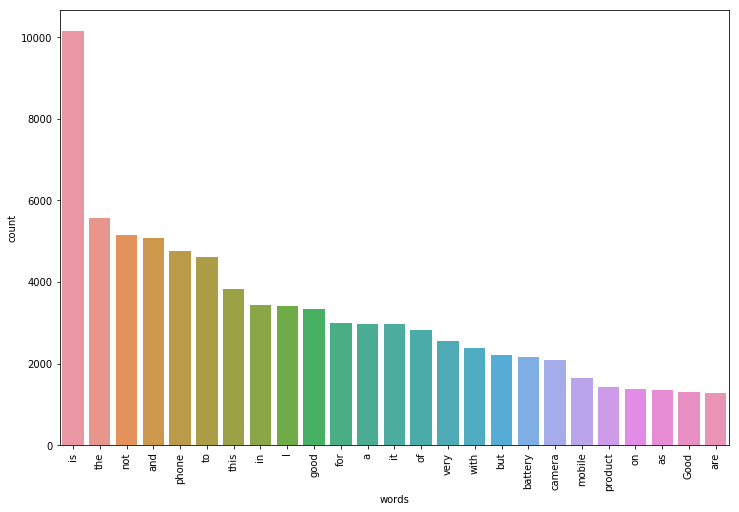

In [78]:
plt.figure(figsize=(12,8))
data = df.sort_values(by='count',ascending=False).head(25)
sns.barplot(x='words',y='count',data=data)
plt.xticks(rotation='vertical')

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer(max_features=10)

In [2]:
# tf_idf_vec = tf_idf_vec(max_features=10)
X = tf_idf_vec.fit_transform(reviews['clean_review'])
tfidf_vect_bigram =tf_idf_vec.get_feature_names()

In [83]:
import seaborn as sns

In [1]:
DTM_bigram = pd.DataFrame(X.toarray(),columns=tfidf_vect_bigram)
df = pd.DataFrame(DTM_bigram.apply(sum,axis=0).sort_values(ascending=False)).reset_index()
df.columns = ['words','count']
df_vec = DTM_bigram[DTM_bigram['batteri']==1]
pd.merge(left=reviews,right=df_vec,left_on=reviews.index,right_on=df_vec.index)['review'][3]

In [ ]:
cam_qual = DTM_

In [ ]:
drain = DTM_bigram[DTM_bigram['batteri']==1]
# drain.index
drain.

In [ ]:
drain_df = pd.merge(left=reviews,right=drain,left_on = reviews.index,right_on = drain.index)['review']

In [ ]:
drain_df.head(5)[1]

In [ ]:
cam_qual = DTM_bigram[DTM_bigram['camera good']==2]

In [ ]:
cam_qual.head()

In [ ]:
pd.merge(left=reviews,right=cam_qual,left_on=reviews.index,right_on=cam_qual.index)['review'][0]

In [ ]:
count_vect.vocabulary_

In [ ]:
DTM_bigram['batteri drain'].unique()

In [ ]:
reviews.head()

In [ ]:
afinn = pd.read_csv('AFINN-111.txt',sep='\t',header=None)

In [ ]:
term_score = dict(afinn.values)

In [ ]:
total = []
for txt in reviews['non_stemmed_review']:
    score = []
    for word in word_tokenize(txt.lower()):
        score.append(term_score.get(word,0))
    total.append(sum(score))

In [ ]:
reviews['non_stemmed_sent'] = total

In [ ]:
reviews['sent_prediction'] = reviews.sent.apply(lambda x:1 if x>2 else 0)

In [ ]:
reviews['sent_prediction2'] = reviews.sent.apply(lambda x:1 if x>0 else 0)

In [ ]:
reviews.head(20)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
confusion_matrix(reviews['sentiment'],reviews['sent_prediction'])

In [ ]:
accuracy_score(reviews['sentiment'],reviews['sent_prediction'])

In [ ]:
term_score

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def get_vader_sentiment(text):
    return analyser.polarity_scores(text)['compound']

In [ ]:
total = []
for sent in reviews.review:
    a = get_vader_sentiment(sent)
    if a>0.3:
        total.append(1)
    else:
        total.append(0)

In [ ]:
reviews['vader_sentiment'] = total

In [ ]:
accuracy_score(reviews.sentiment,reviews.vader_sentiment)

In [94]:
x = reviews.clean_review.values
y = reviews.sentiment.values

In [96]:
x.shape

(14675,)

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
vectorizer = CountVectorizer(max_features=2500)

In [100]:
X_train_bow = vectorizer.fit_transform(X_train)

In [101]:
X_test_bow = vectorizer.transform(X_test)

In [102]:
X_train_bow.shape, X_test_bow.shape

((10272, 2500), (4403, 2500))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_bow,y_train)

In [ ]:
y_test_pred = logreg.predict(X_test_bow)

In [ ]:
accuracy_score(y_test,y_test_pred)

In [ ]:
print(classification_report(y_test,y_test_pred))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer(max_features=2500)

In [ ]:
X_train_bow = tf_idf_vec.fit_transform(X_train)

In [ ]:
X_test_bow = tf_idf_vec.transform(X_test)

In [ ]:
logreg.fit(X_train_bow,y_train)

In [ ]:
y_pred = logreg.predict(X_test_bow)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
X_train.shape

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec_uni = TfidfVectorizer(max_features=100)
X = tfidf_vec_uni.fit_transform(reviews['clean_review'])
tfidf_columns = tfidf_vec_uni.get_feature_names()

In [162]:
df1 = pd.DataFrame(X.toarray(),columns=tfidf_columns)

In [163]:
df1

,also,amazing,amazon,android,app,average,awesome,back,backup,bad,...,use,used,using,want,waste,well,work,working,worst,worth
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.182210,0.000000,0.0,0.0,0.000000,0.000000,0.187484,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.176265,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.679196,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.743607,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.359672,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.468692,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [166]:
from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity(df1.T)
sim_mat = pd.DataFrame(sim_mat, columns= df1.columns, index= df1.columns)

,also,amazing,amazon,android,app,average,awesome,back,backup,bad,...,use,used,using,want,waste,well,work,working,worst,worth
also,1.000000,0.024604,0.074699,0.049276,0.063472,0.037088,0.025082,0.079322,0.082629,0.054192,...,0.067191,0.052681,0.067831,0.036397,0.024439,0.059456,0.058057,0.077093,0.064875,0.023826
amazing,0.024604,1.000000,0.034177,0.012675,0.005453,0.002581,0.017183,0.031568,0.018330,0.000977,...,0.007054,0.001270,0.028245,0.003103,0.001072,0.014343,0.001889,0.017260,0.000912,0.018892
amazon,0.074699,0.034177,1.000000,0.019607,0.062130,0.012379,0.023909,0.041352,0.019593,0.054207,...,0.053963,0.029293,0.040077,0.036441,0.036624,0.040081,0.027060,0.064845,0.091668,0.022567
android,0.049276,0.012675,0.019607,1.000000,0.041964,0.018032,0.026271,0.029261,0.026650,0.010886,...,0.040687,0.033872,0.044538,0.008528,0.016658,0.018605,0.026642,0.026557,0.028281,0.017758
app,0.063472,0.005453,0.062130,0.041964,1.000000,0.022292,0.005059,0.024361,0.013228,0.027366,...,0.046541,0.014407,0.037606,0.012114,0.011616,0.021016,0.056914,0.041181,0.022534,0.008360
average,0.037088,0.002581,0.012379,0.018032,0.022292,1.000000,0.008316,0.028455,0.038406,0.013376,...,0.017346,0.010054,0.027829,0.012609,0.002178,0.006330,0.018433,0.018207,0.003252,0.014327
awesome,0.025082,0.017183,0.023909,0.026271,0.005059,0.008316,1.000000,0.027451,0.036264,0.004059,...,0.013429,0.011740,0.028090,0.006977,0.001780,0.011680,0.006991,0.016202,0.001734,0.019484
back,0.079322,0.031568,0.041352,0.029261,0.024361,0.028455,0.027451,1.000000,0.023535,0.041469,...,0.047205,0.032338,0.043581,0.044359,0.007724,0.031574,0.021151,0.039373,0.054647,0.015396
backup,0.082629,0.018330,0.019593,0.026650,0.013228,0.038406,0.036264,0.023535,1.000000,0.067557,...,0.034713,0.028503,0.045846,0.026732,0.019656,0.032075,0.030763,0.022151,0.042230,0.018304
bad,0.054192,0.000977,0.054207,0.010886,0.027366,0.013376,0.004059,0.041469,0.067557,1.000000,...,0.022717,0.018368,0.036132,0.014382,0.026090,0.017876,0.028295,0.042225,0.034130,0.017739


In [171]:
sim_mat['worth'].drop('worth').sort_values(ascending=False)

money        0.182678
price        0.072959
buy          0.055346
features     0.042648
camera       0.042182
product      0.040591
good         0.036067
even         0.034648
battery      0.028982
quality      0.028949
it           0.027723
lenovo       0.027381
dual         0.024964
months       0.024945
great        0.024016
also         0.023826
nice         0.023114
much         0.022814
amazon       0.022567
used         0.021862
fast         0.021248
excellent    0.021072
usage        0.020772
full         0.020700
heating      0.020202
better       0.019491
awesome      0.019484
using        0.019251
amazing      0.018892
issue        0.018598
               ...   
heat         0.010867
hours        0.010841
charger      0.010798
super        0.010759
display      0.010587
takes        0.010491
ram          0.009978
working      0.009951
gets         0.009734
problem      0.009021
charging     0.008935
days         0.008827
time         0.008465
app          0.008360
mode      